<a href="https://colab.research.google.com/github/ndelpuppo/python3-snippets/blob/main/Parralelize_For_Loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import time

def post_req(data):
    response = requests.post('https://jsonplaceholder.typicode.com/posts', data=data)
    return response.status_code

In [ ]:
'''
    Sequential
'''
start = time.perf_counter()
response_sequential = []
for i in range(500):
    response_sequential.append(post_req({'msg':"TestData"},))
print(f'Duration: {time.perf_counter() - start}')

In [ ]:
for response in response_sequential[0:10]:
    print(response)

201
201
201
201
201
201
201
201
201
201


In [ ]:
'''
    Multiprocessing Format
'''
import concurrent.futures
results = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    for i in range(0,50):
        results.append(
            executor.submit(post_req,{})
        )
  
for r in results[:10]:
    print(r.result())

201
201
201
201
201
201
201
201
201
201


In [ ]:
'''
    MultiProcessing
'''
import concurrent.futures
with concurrent.futures.ProcessPoolExecutor() as executor:
    start = time.perf_counter()
    response_process = []
    for i in range(500):
        response_process.append(executor.submit(post_req,{'msg': "test data"}))
print(f'Duration: {time.perf_counter() - start}')

Duration: 48.32404638000003


In [ ]:
for f in response_process[0:10]:
    print(f.result())

201
201
201
201
201
201
201
201
201
201


In [ ]:
'''
    Multithreading
'''
with concurrent.futures.ThreadPoolExecutor() as executor:
    start = time.perf_counter()
    response_process = []
    for i in range(500):
        response_process.append(executor.submit(post_req,{'msg': "test data"}))
print(f'Duration: {time.perf_counter() - start}')

Duration: 10.557890820999091


In [ ]:
for f in response_process[0:10]:
    print(f.result())

201
201
201
201
201
201
201
201
201
201


In [ ]:
def post_req(request_num,data,d):
    response = requests.post('https://jsonplaceholder.typicode.com/posts', data=data)
    d[request_num] = response.status_code

In [ ]:
from multiprocessing import Manager
manager = Manager()
shared_dict = manager.dict()

In [ ]:
with concurrent.futures.ThreadPoolExecutor() as executor:
    start = time.perf_counter()
    for i in range(500):
        executor.submit(post_req,i,{'msg': "test data"},shared_dict)
print(f'Duration: {time.perf_counter() - start}')

Duration: 9.271668905999945


In [ ]:
print(len(shared_dict))

500


In [ ]:
def post_req(request_num,data):
    response = requests.post('https://jsonplaceholder.typicode.com/posts', data=data)
    return {request_num : response.status_code}

In [ ]:
new_dict = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    start = time.perf_counter()
    results = []
    for i in range(500):
        results.append(executor.submit(post_req,i,{'msg': "test data"}))
print(f'Duration: {time.perf_counter() - start}')

Duration: 9.429046459000006


In [ ]:
for r in results:
    new_dict.update(r.result())
print(new_dict)

{0: 201, 1: 201, 2: 201, 3: 201, 4: 201, 5: 201, 6: 201, 7: 201, 8: 201, 9: 201, 10: 201, 11: 201, 12: 201, 13: 201, 14: 201, 15: 201, 16: 201, 17: 201, 18: 201, 19: 201, 20: 201, 21: 201, 22: 201, 23: 201, 24: 201, 25: 201, 26: 201, 27: 201, 28: 201, 29: 201, 30: 201, 31: 201, 32: 201, 33: 201, 34: 201, 35: 201, 36: 201, 37: 201, 38: 201, 39: 201, 40: 201, 41: 201, 42: 201, 43: 201, 44: 201, 45: 201, 46: 201, 47: 201, 48: 201, 49: 201, 50: 201, 51: 201, 52: 201, 53: 201, 54: 201, 55: 201, 56: 201, 57: 201, 58: 201, 59: 201, 60: 201, 61: 201, 62: 201, 63: 201, 64: 201, 65: 201, 66: 201, 67: 201, 68: 201, 69: 201, 70: 201, 71: 201, 72: 201, 73: 201, 74: 201, 75: 201, 76: 201, 77: 201, 78: 201, 79: 201, 80: 201, 81: 201, 82: 201, 83: 201, 84: 201, 85: 201, 86: 201, 87: 201, 88: 201, 89: 201, 90: 201, 91: 201, 92: 201, 93: 201, 94: 201, 95: 201, 96: 201, 97: 201, 98: 201, 99: 201, 100: 201, 101: 201, 102: 201, 103: 201, 104: 201, 105: 201, 106: 201, 107: 201, 108: 201, 109: 201, 110: 201,

In [ ]:
def post_req(request_num,data):
    requests.post('https://jsonplaceholder.typicode.com/posts', data=data)

def mp(num_of_requests):
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for i in range(num_of_requests):
            executor.submit(post_req,i,{'msg': "test data"})

def mt(num_of_requests):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        for i in range(num_of_requests):
            executor.submit(post_req,i,{'msg': "test data"})

request_nums = [5,10,50,100,500,1000,2500,5000,10000]
mp_times = []
mt_times = []

In [ ]:
for num in request_nums:
    start = time.perf_counter()
    mp(num)
    mp_times.append(time.perf_counter() - start)
    print(f'Finished mp for {num} requests')

Finished mp for 5 requests
Finished mp for 10 requests
Finished mp for 50 requests
Finished mp for 100 requests
Finished mp for 500 requests
Finished mp for 1000 requests
Finished mp for 2500 requests


In [ ]:
for num in request_nums:
    start = time.perf_counter()
    mt(num)
    mt_times.append(time.perf_counter() - start)
    print(f'Finished mt for {num}')

Finished mt for 5
Finished mt for 10
Finished mt for 50
Finished mt for 100
Finished mt for 500
Finished mt for 1000
Finished mt for 2500
Finished mt for 5000
Finished mt for 10000


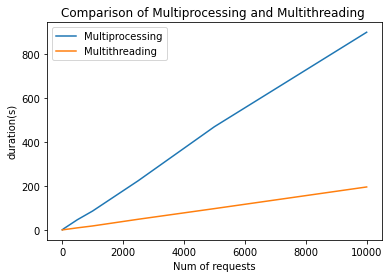

In [ ]:
import matplotlib.pyplot as plt
print(mp_times)
print(mt_times)
plt.plot(request_nums,mp_times, label = "Multiprocessing")
plt.plot(request_nums,mt_times, label = "Multithreading")
plt.xlabel('Num of requests')
# Set the y axis label of the current axis.
plt.ylabel('duration(s)')
# Set a title of the current axes.
plt.title('Comparison of Multiprocessing and Multithreading ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


In [ ]:
import math
import random
def new_func(i):
    tot = sum([random.randint(0, 10) for i in range(100000)])
    return tot % 10

In [ ]:
import concurrent.futures
import time
def mp(num):
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for i in range(10**num):
            executor.submit(new_func,i)

def mt(num):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        for i in range(10**num):
            executor.submit(new_func,i)

nums = list(range(5))
mp_times = []
mt_times = []

In [ ]:
for num in nums:
    start = time.perf_counter()
    mp(num)
    mp_times.append(time.perf_counter() - start)
    print(f'Finished mp for {10**num}')

Finished mp for 1
Finished mp for 10
Finished mp for 100
Finished mp for 1000
Finished mp for 10000


In [ ]:
for num in nums:
    start = time.perf_counter()
    r = mt(num)
    mt_times.append(time.perf_counter() - start)
    print(f'Finished mt for {10**num}')

In [ ]:
import matplotlib.pyplot as plt
print(mp_times)
print(mt_times)
plt.plot(nums,mp_times, label = "Multiprocessing")
plt.plot(nums,mt_times, label = "Multithreading")
plt.xlabel('10**x')
# Set the y axis label of the current axis.
plt.ylabel('duration(s)')
# Set a title of the current axes.
plt.title('Comparison of Multiprocessing and Multithreading ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
